# References
1. [Power Tips: Calculate an R-C Snubber in Seven Steps](https://www.ti.com/document-viewer/lit/html/SSZTBC7)
2. [Calculating An R-C Snubber](https://www.eetimes.com/calculating-an-r-c-snubber/)

# Intro
TI's article [Power Tips: Calculate an R-C Snubber in Seven Steps](https://www.ti.com/document-viewer/lit/html/SSZTBC7) describes a systematic method to design RC snubber for SMPS ringing supression.

[Calculating An R-C Snubber](https://www.eetimes.com/calculating-an-r-c-snubber/) provides more explainations on how the formulas are chosen. Rsnub is preferred matching characteristic impedance, while it's best to adjust Csnub to make further trade-off between power dissipation and ring amplitude.

# RC snubber calculation
The keys steps are like below. This document is to automate the process with script.

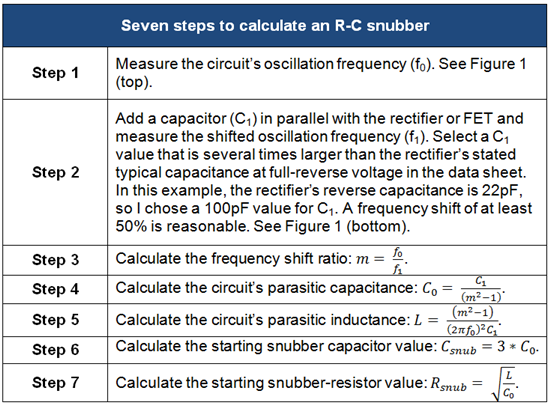

We use the example from the document to demo the calculation.

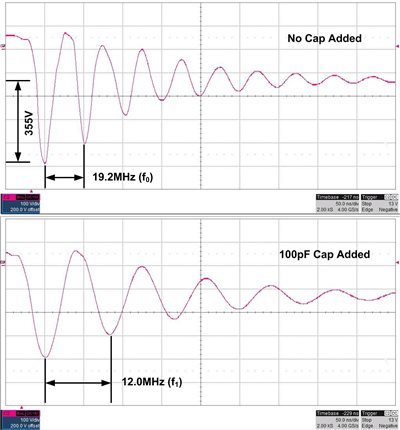

In [1]:
from math import pi, sqrt

class RcSnubber:
  def __init__(self, f0, f1, C1):
    self.f0 = f0
    self.f1 = f1
    self.C1 = C1

  @property
  def m(self):
    return self.f0/self.f1

  @property
  def C0(self):
    return self.C1/((self.m**2) - 1)

  @property
  def L(self):
    return ((self.m**2) - 1)/(((2* pi * self.f0)**2) * self.C1)

  @property
  def Csnub(self):
    return 3*self.C0

  @property
  def Rsnub(self):
    return sqrt(self.L/self.C0)

In [2]:
RC = RcSnubber(19.2e6, 12.0e6, 100e-12)
print (RC.Csnub, RC.Rsnub)

1.9230769230769226e-10 129.313391262165
